## EDA Student Performance Indicator




### 1) Problem statement

#### This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
* Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
*The data consists of 8 column and 1000 rows.

###  3) Dataset Information

 * gender : sex of students -> (Male/female)
 
 *race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
 
 *parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
 
 *lunch : having lunch before test (standard or free/reduced)
 
 *test preparation course : complete or not complete before test
 
 *math score
 
 *reading score
 
 *writing score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")

In [2]:
path = "C:/Users/himan/Downloads/stud.csv"

data = pd.read_csv(path)

In [3]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.shape

(1000, 8)

### Data Checks to perform
* Check Missing values
*Check Duplicates
*Check data type
*Check the number of unique values of each column
*Check statistics of data set
*Check various categories present in the different categorical column
[ ]


In [5]:
data.isnull().sum()  # no null values 

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
data.duplicated().sum() # no duplicated values

0

In [7]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [9]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## observations ------
* Data has zero null and duplicates values.
* Data has 5 race_ethicity, 6 level of parental education, 
* mean scored are in range of 66 to 68
* someone has scored 0 mark in math, 17,10 are min marks in other two test.
* some students has scored full marks also.

In [10]:
data.tail()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [11]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
numarical_features = [features for features in data.columns if data[features].dtype!="O"]
categorical_features = [features for features in data.columns if data[features].dtype == "O"]

In [13]:
numarical_features

['math_score', 'reading_score', 'writing_score']

In [14]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [15]:
data["gender"].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [16]:
data["race_ethnicity"].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race_ethnicity, dtype: int64

In [17]:
data["parental_level_of_education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

In [18]:
data["lunch"].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [19]:
data["test_preparation_course"].value_counts()

none         642
completed    358
Name: test_preparation_course, dtype: int64

In [20]:
data["total_score"] = data["math_score"]+data["reading_score"]+data["writing_score"]
data["avg_score"] = data["total_score"]/3

In [21]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


Text(0.5, 1.0, 'Average score in gender')

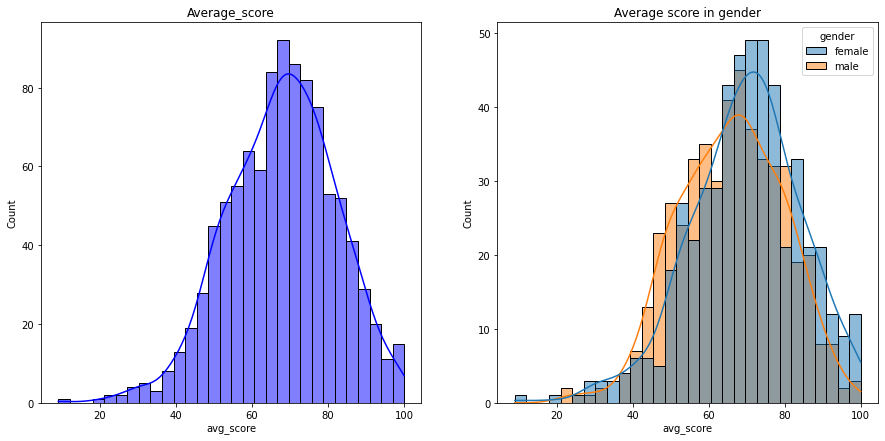

In [22]:
fig,axis = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=data,x="avg_score",bins=30,kde=True,color="b")
plt.title("Average_score")
plt.subplot(122)
sns.histplot(data=data,x="avg_score",bins=30,kde=True,hue="gender")
plt.title("Average score in gender")




## Insights ---

* Female students has much better performance than male students.



Text(0.5, 1.0, 'gerder(male)-lunch')

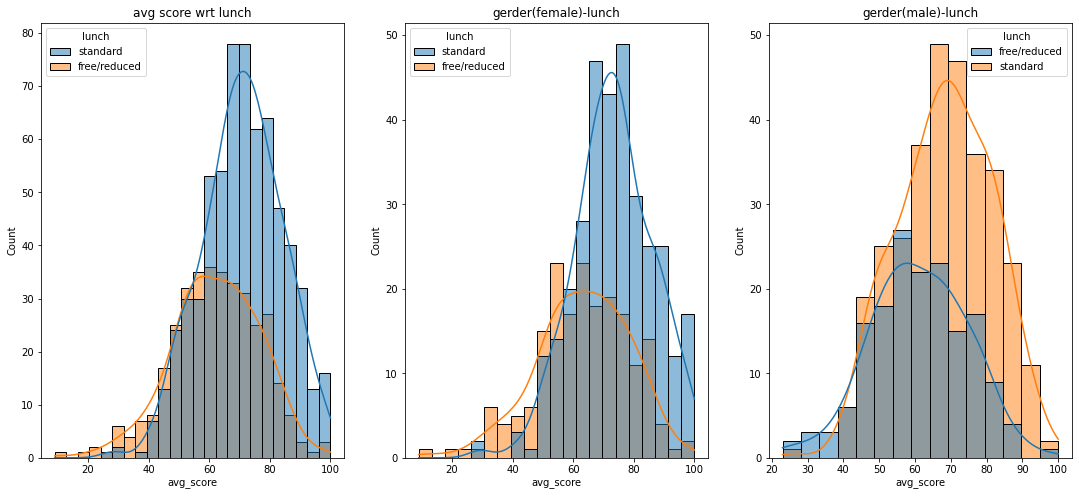

In [23]:
fig,axis = plt.subplots(1,3,figsize=(25,8))
plt.subplot(141)
sns.histplot(data=data,x="avg_score",kde=True,hue='lunch')
plt.title("avg score wrt lunch")

plt.subplot(142)
sns.histplot(data=data[data.gender=='female'],x="avg_score",kde=True,hue="lunch")
plt.title("gerder(female)-lunch")

plt.subplot(143)
sns.histplot(data=data[data.gender=='male'],x="avg_score",kde=True,hue="lunch")
plt.title("gerder(male)-lunch")





## INSIGHTS -- 
* STUDENTS EATING STANDARD GAINED GOOD MARKS

Text(0.5, 1.0, 'gerder(male)-lunch')

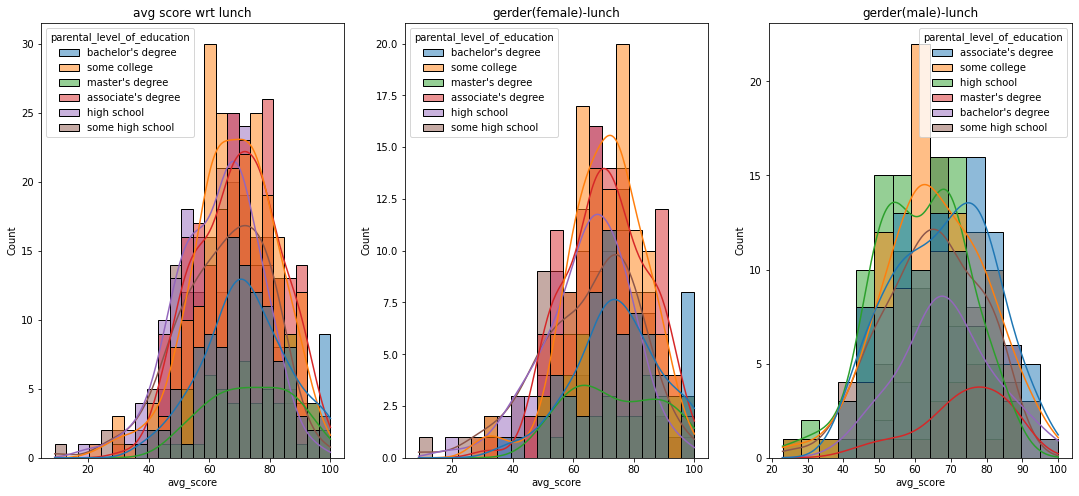

In [24]:
fig,axis = plt.subplots(1,3,figsize=(25,8))
plt.subplot(141)
sns.histplot(data=data,x="avg_score",kde=True,hue='parental_level_of_education')
plt.title("avg score wrt lunch")

plt.subplot(142)
sns.histplot(data=data[data.gender=='female'],x="avg_score",kde=True,hue="parental_level_of_education")
plt.title("gerder(female)-lunch")

plt.subplot(143)
sns.histplot(data=data[data.gender=='male'],x="avg_score",kde=True,hue="parental_level_of_education")
plt.title("gerder(male)-lunch")

## INSIGHTS --
* IN 1st and 2nd plots parental education don't seems very effective for the students scores.

* In 3rd plot it have some tilt,parent with masters, associate degree there male child tends to perform well.


Text(0.5, 1.0, 'gerder(male)/level of groups')

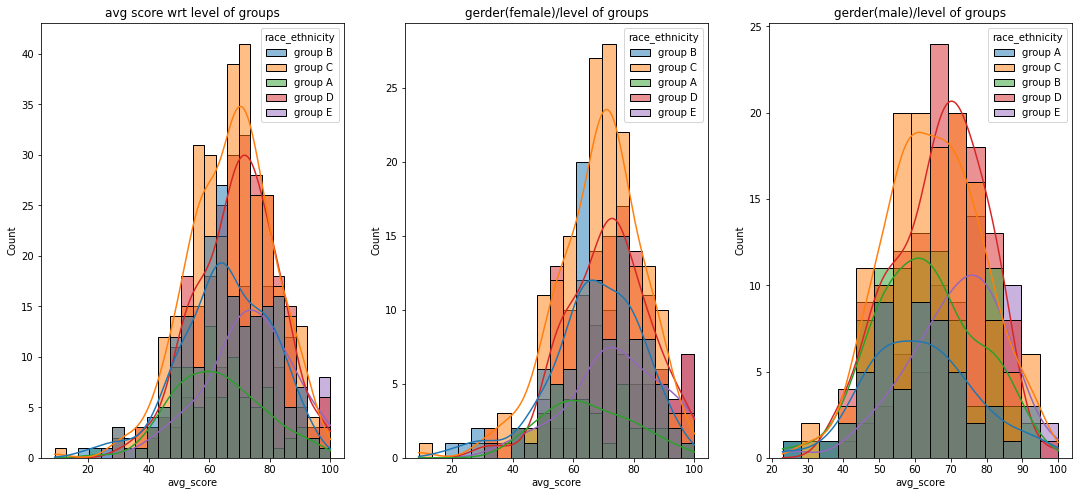

In [25]:
fig,axis = plt.subplots(1,3,figsize=(25,8))
plt.subplot(141)
sns.histplot(data=data,x="avg_score",kde=True,hue='race_ethnicity')
plt.title("avg score wrt level of groups")

plt.subplot(142)
sns.histplot(data=data[data.gender=='female'],x="avg_score",kde=True,hue="race_ethnicity")
plt.title("gerder(female)/level of groups")

plt.subplot(143)
sns.histplot(data=data[data.gender=='male'],x="avg_score",kde=True,hue="race_ethnicity")
plt.title("gerder(male)/level of groups")

## Insights --

* female students belongs to Group-A scored avg_marks.
* Large number of female students are from Group-C.
* Students from Group-A,B HAVE poor marks.
* Group-E female and male have fairly good marks then other Groups. 

<AxesSubplot:xlabel='avg_score', ylabel='Count'>

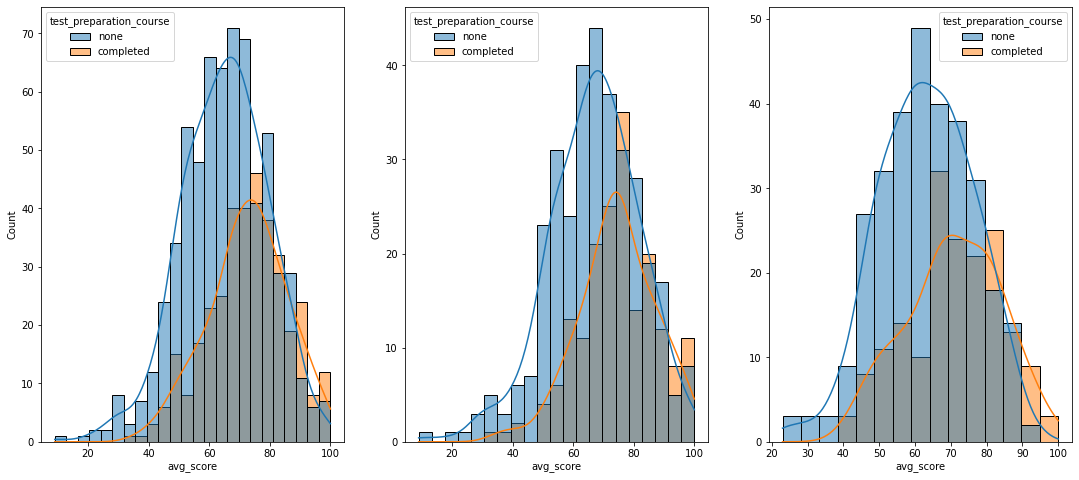

In [27]:
fig,axis = plt.subplots(1,3,figsize=(25,8))
plt.subplot(141)
sns.histplot(data=data,x="avg_score",kde=True,hue='test_preparation_course')


plt.subplot(142)
sns.histplot(data=data[data.gender=='female'],x="avg_score",kde=True,hue="test_preparation_course")


plt.subplot(143)
sns.histplot(data=data[data.gender=='male'],x="avg_score",kde=True,hue="test_preparation_course")


# Insights
*  Students who completed the test preparation course has scored good marks.

<AxesSubplot:>

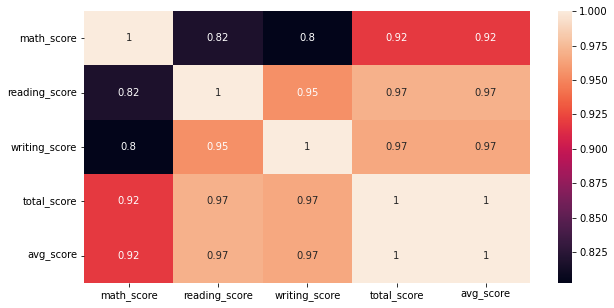

In [26]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)

# Insights

* avg_score is positive correlated with maths marks as maths marks are good then there reading and writing marks are also good.